## Adagrad Algorithm


In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [126]:
x_data = np.linspace(0,20,50)
y_data = -1 * x_data + 2* np.ones(len(x_data))
x_data = x_data.reshape(len(x_data),1)
x_data = np.insert(x_data,0,np.ones(x_data.shape[0]),axis=1)
thetas = np.zeros(x_data.shape[1])
learning_rate = 0.001
epsilon = 0.0001
learning_rate2 = 0.05
epsilon2 = 0.001

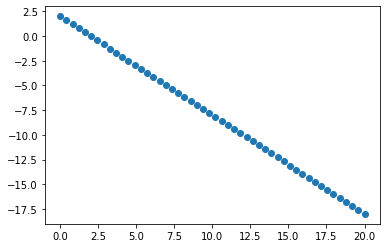

In [127]:
plt.scatter(x_data[:,1],y_data)
plt.show()

In [128]:
def predict_y(all_thetas,x_values):
    return x_values @ all_thetas

def gradient_thetas(x_values,y_values,all_thetas):
    return (1/len(x_values[:,0]))*(x_values.T @(predict_y(all_thetas,x_values)- y_values))

def update_thetas (all_thetas,lrate,x_values,y_values,vt,epsilon):
    vt = vt + (gradient_thetas(x_values,y_values,all_thetas))**2
    adlrate = lrate / ((np.sqrt(vt))+epsilon)
    return all_thetas - adlrate * (gradient_thetas(x_values, y_values, all_thetas))

def data_loss(x_values,y_values,all_thetas):
    return (1/len(x_values[:,0]))*np.sum((predict_y(all_thetas,x_values)- y_values)**2)

In [129]:
def adagrad(x_values,y_values,all_thetas,lrate,epsln):
    data_all_loss = []
    data_all_thetas = []
    all_predictions = []
    vt=np.zeros(x_data.shape[1])
    count=0
    for i in range(1000):
        all_thetas = update_thetas(all_thetas,lrate,x_values,y_values,vt,epsln)
        data_all_thetas.append(all_thetas)
        data_all_loss.append(data_loss(x_values,y_values,all_thetas))
        y_predict = predict_y(all_thetas,x_values)
        all_predictions.append(y_predict)
        count+=1
        if i>=1 and abs(data_all_loss[-1] - data_all_loss[-2])<1e-2:
            break
    return y_predict,count,data_all_thetas,data_all_loss,all_predictions

# First Trial Plots

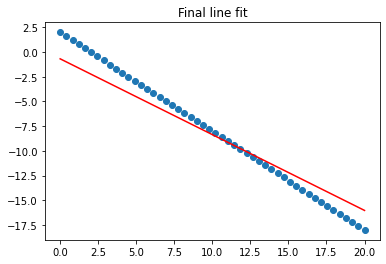

In [130]:
plt.title("Final line fit")
plt.scatter(x_data[:,1],y_data)
plt.plot(x_data[:,1],adagrad(x_data,y_data,thetas,learning_rate,epsilon)[0],color="red")
plt.show()

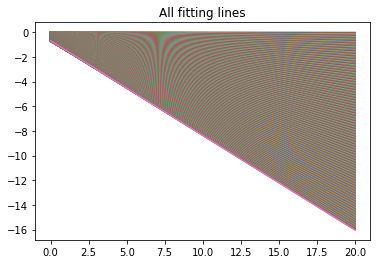

In [131]:
plt.title("All fitting lines")
for i in range (len(adagrad(x_data,y_data,thetas,learning_rate,epsilon)[4])):
    plt.plot(x_data[:,1],adagrad(x_data,y_data,thetas,learning_rate,epsilon)[4][i])
plt.show()

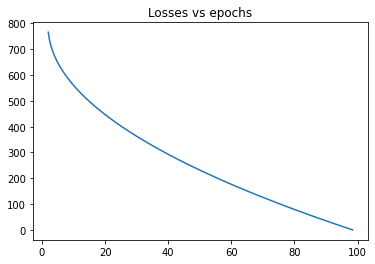

In [132]:
plt.title("Losses vs epochs")
plt.plot(adagrad(x_data,y_data,thetas,learning_rate,epsilon)[3],
         list(range(adagrad(x_data,y_data,thetas,learning_rate,epsilon)[1])))
plt.show()


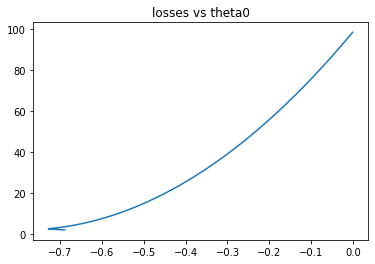

In [133]:
plt.title("losses vs theta0")
losses = np.array(adagrad(x_data,y_data,thetas,learning_rate,epsilon)[2])
plt.plot(losses[:,0],
        adagrad(x_data,y_data,thetas,learning_rate,epsilon)[3])
plt.show()


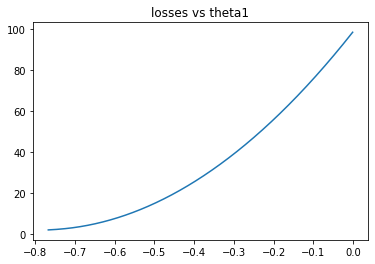

In [134]:
plt.title("losses vs theta1")
losses = np.array(adagrad(x_data,y_data,thetas,learning_rate,epsilon)[2])
plt.plot(losses[:,1],adagrad(x_data,y_data,thetas,learning_rate,epsilon)[3])
plt.show()

# Second Trial Plots

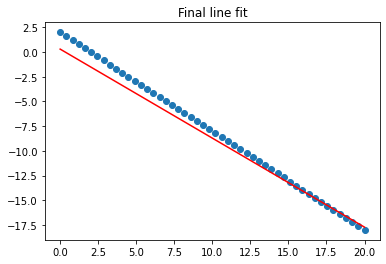

In [135]:
plt.title("Final line fit")
plt.scatter(x_data[:,1],y_data)
plt.plot(x_data[:,1],adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[0],color="red")
plt.show()

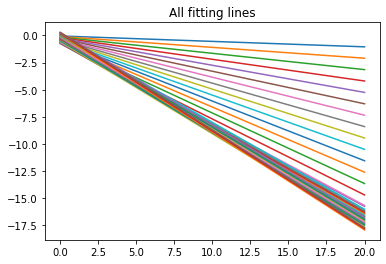

In [136]:
plt.title("All fitting lines")
for i in range (len(adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[4])):
    plt.plot(x_data[:,1],adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[4][i])
plt.show()

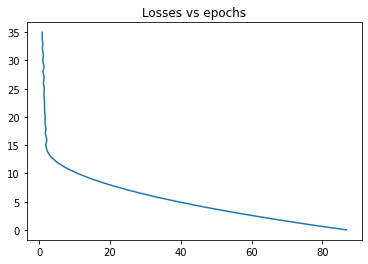

In [137]:
plt.title("Losses vs epochs")
plt.plot(adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[3],
         list(range(adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[1])))
plt.show()


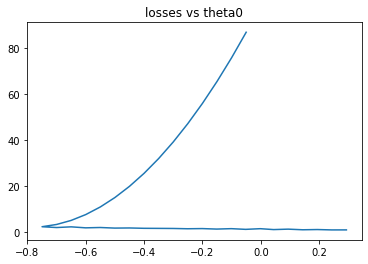

In [138]:
plt.title("losses vs theta0")
losses = np.array(adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[2])
plt.plot(losses[:,0],
        adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[3])
plt.show()


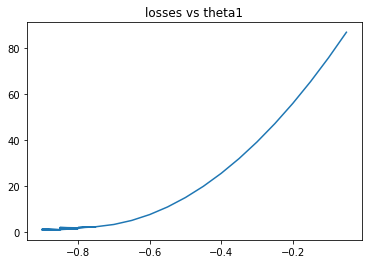

In [139]:
plt.title("losses vs theta1")
losses = np.array(adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[2])
plt.plot(losses[:,1],adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[3])
plt.show()

# Accuracy Scores

In [140]:
print("The First Trial")
print(f"The Accuracy = {r2_score(y_data,adagrad(x_data,y_data,thetas,learning_rate,epsilon)[0])}")
print(f"The number of iterations needed = {adagrad(x_data,y_data,thetas,learning_rate,epsilon)[1]}")

The First Trial
The Accuracy = 0.9419964982071877
The number of iterations needed = 767


In [141]:
print("The Second Trial")
print(f"The Accuracy = {r2_score(y_data,adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[0])}")
print(f"The number of iterations needed = {adagrad(x_data,y_data,thetas,learning_rate2,epsilon2)[1]}")


The Second Trial
The Accuracy = 0.9754494171807482
The number of iterations needed = 36
